In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

# Data Preprocessing
Resources : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

In [131]:
# Uploading the dataset in the object name data
data = pd.read_excel('/content/Training data.xlsx')


In [132]:
data.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


In [133]:
data["internet"].unique()

array(['no', 'yes'], dtype=object)

So only two types of values in the internet column , so they can mapped easily as 0 for no and 1 for yes.

In [134]:
data["internet"].isnull().sum()

0

In [135]:
data["internet"] = data["internet"].map({"no":0,"yes":1})

In [136]:
data["internet"].unique()

array([0, 1])

In [137]:
type(data["internet"][0])

numpy.int64

In [138]:
data["sex"].unique()

array(['M', 'F'], dtype=object)

Mapping also can be performed here to fit the no numeric data so F : 0 and M : 1  

In [139]:
data["sex"] = data["sex"].map({"F":0,"M":1})

In [140]:
data["sex"].unique()

array([1, 0])

In [141]:
type(data["sex"][0])

numpy.int64

Now we have all of our columns in numeric form

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   internet    1000 non-null   int64  
 1   sex         1000 non-null   int64  
 2   traveltime  1000 non-null   int64  
 3   studytime   1000 non-null   int64  
 4   freetime    1000 non-null   int64  
 5   absences    1000 non-null   int64  
 6   age         1000 non-null   int64  
 7   iq          1000 non-null   int64  
 8   marks       1000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


In [143]:
def feature_changing(x):
  # ---------
  x["internet"] = x["internet"].map({"no":0,"yes":1})
  x["sex"] = x["sex"].map({"F":0,"M":1})
  # ---------
  return x


# 8 features and 1 input ( Marks )

In [203]:
# Splitting the dataset into x_train and y_train

x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

x_train.shape

(1000, 8)

Plotting different feature Vs output graphs to lookup which features are helpful

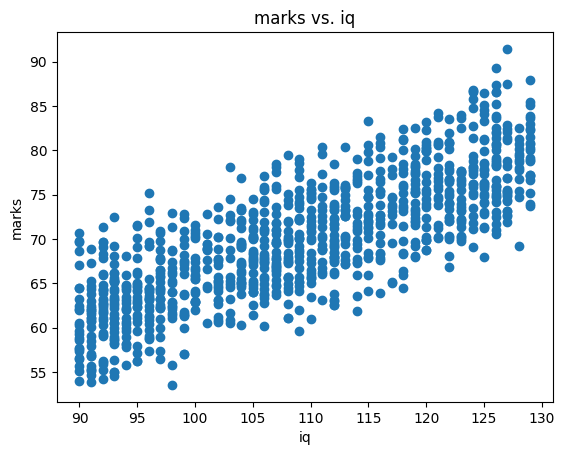

In [145]:
plt.plot(x_train[:,7], y_train, marker='o', linestyle='None')

plt.xlabel(data.columns[7])
plt.ylabel(data.columns[-1])
plt.title(f'{data.columns[-1]} vs. {data.columns[7]}')

plt.show()

All features are relevant and necesarry for predicting marks

# Training

In [146]:
def z_score(x_train):

  # ---------
  x_mean = np.mean(x_train,axis=0)
  x_std = np.std(x_train,axis=0)
  x_train = (x_train - x_mean)/x_std
  # ---------

  return x_train,x_std,x_mean

In [147]:
def cost(x_train,y_train,w,b):

  # ---------
  y_pred = np.dot(x_train,w) + b
  # MSE as loss
  loss = (y_pred - y_train)**2
  cost = np.mean(loss)/2
    # return cost
  # ---------

  return cost

In [204]:
def gradient_descent(x_train,y_train,w,b):

  # # ---------
  y_pred = np.dot(x_train,w) + b
  lr = 0.01
  error = y_pred - y_train

  for col in range(x_train.shape[1]):
     x_train_col = x_train[:,col].reshape(-1,1)
     w[col] = w[col] - lr*np.mean(error*x_train_col)

  # derivative of loss wrt bias
  db = np.mean(error)
  b = b - lr*db

  return w,b

In [205]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  print(cost(x_train,y_train,w,b))
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)


2493.6788577577954
2444.0423300034918
2395.393841806979
2347.713725185126
2300.982703678825
2255.181884558803
2210.2927511866083
2166.2971555276663
2123.177310813389
2080.9157843493654
2039.495490466726
1998.8996836138308
1959.1119515854841
1920.1162088869482
1881.8966902300563
1844.437944158812
1807.7248268018811
1771.7424957494673
1736.4764040520747
1701.9122943387501
1668.0361930524148
1634.8344047999567
1602.293506814801
1570.4003435297197
1539.1420212576797
1508.505902978587
1478.4796032298127
1449.0509830984386
1420.2081453131914
1391.93942943409
1364.2334071378514
1337.0788775971557
1310.4648629518963
1284.3806038705889
1258.81555520014
1233.75938170222
1209.2019538745121
1185.1333438551517
1161.5438214086982
1138.4238499920154
1115.7640828984693
1093.5553594788867
1071.7887014377459
1050.4553092030983
1029.5465583687562
1009.0539962073087
988.9693382525527
969.2844649499608
949.9914183738276
931.0823990097701
912.5497626012794
894.3860170590499
876.583819431835
859.135972937604

In [187]:
data_test = pd.read_excel('/content/Test data.xlsx')
data_test = feature_changing(data_test)

In [188]:
data_test.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,1,0,1,3,4,5,18,114,74.59
1,0,0,3,2,3,5,19,97,65.28
2,0,1,2,4,4,7,18,114,79.24
3,1,0,1,1,3,9,18,107,62.66
4,1,0,3,1,1,3,18,111,67.83


In [189]:
x_test = np.array(data_test.iloc[:,0:8])
y_test = np.array(data_test.iloc[:,8]).reshape(-1,1)
x_test = (x_test - x_mean)/x_std

In [206]:
y_predict = np.dot(x_test,w) + b

In [207]:
accuracy = 0
for dim in range(len(y_test)):
  if abs(y_predict[dim]-y_test[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
